# Dados

<img src='du.png'>

## Coletar os dados 

* Dados primários (coleta na fonte): Surveys, Experimentos, Grupos de Foco
 - custo elevado
 - muito tempo/ baixa qualidade
 - conseguir exatamente os dados que precisamentos

* Dados Secundários (já disponivéis): open data sourcers, ERP, industry reports
    - fácil / acesso rápido
    - baixo custo
    - dados irrelevantes

### Tipos de Dados 

<img src='tipos_dados.png'>

* **Tipo**: 
    - Define se o atributo representa quantidades (quantitativo ou númerico) ou qualidades (simbólico ou categórico)
    - Ex. de conuntos qualitativos são {pequeno, médio, grande} e {matemática, fisíca, quimíca}. Apesar de alguns conjuntos poderem ser ordenados, oeprações matemáticas não podem ser aplicadas 
    - Atributos quantitativos podem ser contínuos ou discretos

<img src='tipos_atributos.png'>

<font color='red'>  Observe que uma medida quantitativa possui,além do valor numérico, uma unidade, por exemplo, metro. </font>

* Atributos quantitativos podem assumis valores binários, inteiros ou reais. Já os qualitativos são, geralmente, representados, por um número finito de símbolos ou nomes.
* Entretanto, alguns atributos categóricos são representados por números, mas nesse caso, não faz sentido a utilização de operadores aritméticos sobre os seus valores

* **Escala** 
    - Define as operações que podem ser realizadas sobre os valores de um atributo 
    - Nominais(quali), ordinais(quali), intervalares(quanti) e racionais(quanti)

* Nominais: 
    - valores são apenas nomes diferentes, carregando a menor quantidade de informação possível
    - não existe relação de ordem 
    - as operações mais utilizadas são de igualdade e desigualdade
    - ex.: nome do paciente, RG, CPF, CEP
        
* Ordinais:
    - refletem uma ordem das categorias representadas
    - as operações utilizadas são; >, >=,  <, <=, ==,!=
    - ex.: hierarquia militar, avaliações do tempo (frio, morno, quente)
        
* Intervalares:
    - são representados por números que variam dentro de um intervalo
    - é possível definir tanto a ordem quanto a diferença em magnitude entre dois valores
    - a diferença em magnitude indica a distância que separa dois valores no intevalo de possíveis valores
    
* Racionais:
    - são os que carregam mais informação
    - os números tem um significado absoluto, ou seja, faz sentido utilizar a razão entre dois valores 

### Balanceamento 

<img src='imbalanced.png'>

* Uma classe abaixo dos 30% normalmente é um problema de desbalanceamento

### Dados Estruturados e Não estruturados 

<img src='structured_data.jpg'>

### Batch vs Streaming 

### Big Data vs Not Big Data

## Análise Exploratória 

<img src='bussinessmoments.png'>

<img src='skewess.png'>

<img src='kurtosis.png'>

* **Representação Gráfica:**
    - Univariada:
        - Boxplot: identificar outlier e o shape da distribuição
        - Histograma: identificar o shape da distribuição e identificar outliers
        - Q-Qplot: dados são normais ou não
    - Bivariada:
        - Scatter plot: correlação (positiva, negativa, não existe), força (moderada, forte, fraca), linear ou nao linear; Outliers
    - Multivariada:
         - Regressão

## Qualidade dos dados 

* Identificar outliers
* Identificar dados faltantes
* Identificar diferentes níveis de granularidade
* Validação e confiabilidade
* Dados Inconsistentes
* Informação errada
* Metadados errados 

# Vamos para a prática? 

Objetivo: Prever qual será a tecnologia do momento dadas as perguntas do stackoverflow

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
answers = pd.read_csv('archive/Answers.csv', encoding='latin-1', nrows=50)
questions = pd.read_csv('archive/Questions.csv', encoding='latin-1', nrows=50)
tags =  pd.read_csv('archive/Tags.csv', encoding='latin-1', nrows=50)

* todas as respostas tem score?
* quais as estatisticas desses scores?
* existem respostas dadas pelo mesmo userID?
* existem respostas e pergutnas dasdas pelo mesmo userID?
* qual a distribuição de datas?
* existem perguntas sem resposta?
* quais tags mais aparecem?

 * todas as perguntas tem score? 

In [27]:
questions.Score.isnull().sum()

0

* quais as estatisticas desses scores?

In [24]:
questions.Score.describe()

count      50.000000
mean       63.460000
std       225.436376
min         2.000000
25%        14.000000
50%        24.000000
75%        41.750000
max      1614.000000
Name: Score, dtype: float64

* existem perguntas criadas pelo mesmo ownerID?

In [30]:
questions[questions.OwnerUserId.duplicated()]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
16,1300,91.0,2008-08-04T14:55:04Z,NaN,23,Is nAnt still supported and suitable for .net ...,<p>I am using MSBuild to build my stuff. I wan...
24,2250,383.0,2008-08-05T13:07:40Z,NaN,83,Datatable vs Dataset,<p>I currently use a DataTable to get results ...
33,2840,383.0,2008-08-05T20:57:00Z,NaN,32,Paging SQL Server 2005 Results,<p>How do I page results in SQL Server 2005?</...
35,2970,58.0,2008-08-05T23:55:25Z,2012-03-06T03:17:01Z,17,My website got hacked... What should I do?,<p>My dad called me today and said people goin...
38,3230,370.0,2008-08-06T09:49:27Z,NaN,25,How do you pack a visual studio c++ project fo...,<p>I'm wondering how to make a release build t...
41,3470,383.0,2008-08-06T14:36:56Z,NaN,12,How do I Transform Sql Columns into Rows?,<p>I have a very simple problem which requires...
42,3510,383.0,2008-08-06T14:54:52Z,NaN,16,"What does the term ""BODMAS"" mean?",<p>What is BODMAS and why is it useful in prog...


* qual a distribuição de datas com maior quantidade de pergutnas? 

In [44]:
import dateutil.parser

def format_data(d):
# d = dateutil.parser.parse('2008-09-26T01:51:42.000Z')
    return d.strftime('%Y-%m-%d')  #==> '09/26/2008'

In [48]:
questions['CreationDay']= pd.to_datetime(questions['CreationDate'], format=('%Y-%m-%dT%H:%M:%S.%f'))
questions['CreationDay'] = questions.CreationDay.apply(lambda x: format_data(x))

<AxesSubplot:xlabel='CreationDay'>

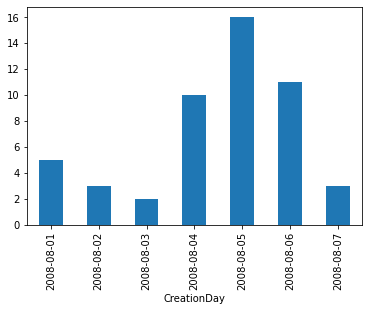

In [53]:
questions.groupby(questions["CreationDay"])['Id'].count().plot(kind="bar")

str

In [3]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [4]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [23]:
answers.Score

0     13
1     12
2      1
3      4
4     28
5     19
6      6
7      5
8      8
9      3
10    21
11    13
12    17
13     2
14     3
15     1
16    69
17     4
18     0
19     3
20     4
21     0
22    15
23    26
24     9
25     2
26    32
27     5
28     1
29    11
30     7
31     2
32     2
33     2
34     3
35    13
36     3
37     1
38     7
39     2
40    11
41     3
42     4
43     0
44     2
45    16
46     2
47     5
48     0
49     6
Name: Score, dtype: int64

In [22]:
questions.loc[questions['Title'].str.contains(".NET", case=False)]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
14,1160,120.0,2008-08-04T11:37:24Z,NaN,36,Use SVN Revision to label build in CCNET,<p>I am using CCNET on a sample project with S...
16,1300,91.0,2008-08-04T14:55:04Z,NaN,23,Is nAnt still supported and suitable for .net ...,<p>I am using MSBuild to build my stuff. I wan...
20,1760,234.0,2008-08-05T00:51:49Z,NaN,51,.NET Unit Testing packages?,<p>Getting back into a bit more .NET after a f...
28,2550,308.0,2008-08-05T16:39:04Z,NaN,16,What are effective options for embedding video...,<p>A quick glance at the present-day internet ...
47,4170,NaN,2008-08-07T00:25:03Z,NaN,9,How to learn ADO.NET,<p>I need to learn ADO.NET to build applicatio...
48,4230,392.0,2008-08-07T00:54:31Z,NaN,34,The Difference Between a DataGrid and a GridVi...,<p>I've been doing ASP.NET development for a l...
49,4320,1525924.0,2008-08-07T02:41:24Z,NaN,2,ASP.Net 2.0 Application without Business Logic...,"<p>Is it ""acceptable"" to have an <strong>ASP.N..."


In [55]:
pd.merge(questions,answers, how='left', left_on='Id', right_on='ParentId')

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Body_x,CreationDay,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Body_y
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,2008-08-01,124.0,26.0,2008-08-01T16:09:47Z,80.0,12.0,<p>I wound up using this. It is a kind of a ha...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,2008-08-01,92.0,61.0,2008-08-01T14:45:37Z,90.0,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,2008-08-01,199.0,50.0,2008-08-01T19:36:46Z,180.0,1.0,<p>I've read somewhere the human eye can't dis...
4,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,2008-08-01,529.0,86.0,2008-08-02T18:16:07Z,180.0,3.0,<p>Isn't it also a factor which order you set ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,4080,235.0,2008-08-06T22:45:27Z,2012-05-05T13:39:59Z,92,What code analysis tools do you use for your J...,<p>What code analysis tools do you use on your...,2008-08-06,NaN,NaN,NaN,NaN,NaN,NaN
78,4110,369.0,2008-08-06T23:19:50Z,2014-12-30T11:43:01Z,7,What program can I use to generate diagrams of...,<p>I've been tasked with redesigning part of a...,2008-08-06,NaN,NaN,NaN,NaN,NaN,NaN
79,4170,NaN,2008-08-07T00:25:03Z,NaN,9,How to learn ADO.NET,<p>I need to learn ADO.NET to build applicatio...,2008-08-07,NaN,NaN,NaN,NaN,NaN,NaN
80,4230,392.0,2008-08-07T00:54:31Z,NaN,34,The Difference Between a DataGrid and a GridVi...,<p>I've been doing ASP.NET development for a l...,2008-08-07,NaN,NaN,NaN,NaN,NaN,NaN
